In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Radioactive decay

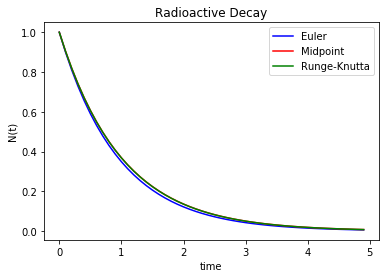

In [2]:
def N_exact(t, N_0, tau):
    return N_0*np.exp(-t/tau)

tau = 1
N_0 = 1 
delta_t = 0.1*tau

T_max = len(np.arange(0,5,delta_t))

ts = np.zeros(T_max)
n_euler = np.zeros(T_max)
n_midpoint = np.zeros(T_max)
n_RK = np.zeros(T_max)

n_euler[0] = 1
n_midpoint[0] = 1
n_RK[0] = 1

for i in range(len(ts) - 1):
    ts[i+1] = ts[i] + delta_t
    
    # Euler method
    n_euler[i+1] = n_euler[i] - (n_euler[i]/tau)*delta_t
    
    # Midpoint method
    k1 = -(n_midpoint[i]/tau)
    k2 = (-1/tau)*(n_midpoint[i] + 0.5*k1*delta_t)
    n_midpoint[i+1] = n_midpoint[i] + k2*delta_t
    
    # Runge-Knutta
    k1 = -1/tau * n_RK[i]
    k2 = -1/tau * (n_RK[i] + (delta_t/2)*k1)
    k3 = -1/tau * (n_RK[i] + (delta_t/2)*k2)
    k4 = -1/tau * (n_RK[i] + delta_t*k3)
    n_RK[i+1] = n_RK[i] + (1/6)*(k1 + 2*k2 + 2*k3 + k4)*delta_t
    
plt.plot(ts, n_euler, 'b', label='Euler')
plt.plot(ts, n_midpoint, 'r', label='Midpoint')
plt.plot(ts, n_RK, 'g', label='Runge-Knutta')
plt.title('Radioactive Decay')
plt.xlabel('time')
plt.ylabel('N(t)')
plt.legend()
plt.show()

# Free fall

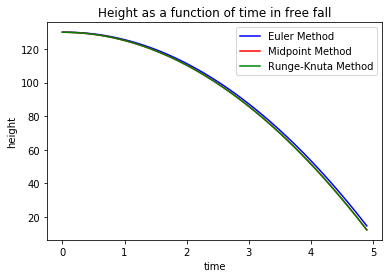

In [3]:
g = 9.8
dt = 0.1
T_max = len(np.arange(0,5,dt))

ts = np.zeros(T_max)
h_euler = np.zeros(T_max)
h_mid = np.zeros(T_max)
h_rk = np.zeros(T_max)
v = np.zeros(T_max)

h_euler[0] = 130
h_mid[0] = 130
h_rk[0] = 130

for i in range(len(ts) - 1):
    ts[i+1] = ts[i] + dt
    v[i+1] = v[i] + g*dt
    
    # Euler method
    h_euler[i+1] = h_euler[i] - v[i]*dt
    
    # Midpoint method
    k2 = -g*(ts[i] + dt/2)
    h_mid[i+1] = h_mid[i] + k2*dt
    
    # Runge-Knutta method
    k1 = -g*ts[i]
    k2 = -g*(ts[i] + dt/2)
    k3 = -g*(ts[i] + dt/2)
    k4 = -g*(ts[i] + dt)
    h_rk[i+1] = h_rk[i] + (1/6)*(k1 + 2*k2 + 2*k3 + k4)*dt
    
plt.plot(ts, h_euler, 'b', label='Euler Method')
plt.plot(ts, h_mid, 'r', label='Midpoint Method')
plt.plot(ts, h_rk, 'g', label='Runge-Knuta Method')
plt.title('Height as a function of time in free fall')
plt.xlabel('time')
plt.ylabel('height')
plt.legend()
plt.show()

# Pendulum

In [4]:
def pendulum_euler_cromer(omega_0, theta_0, g, l, delta_t, alpha):
    omega_1 = omega_0 - ((g/l)*np.sin(theta_0) + alpha*omega_0)*delta_t
    theta_1 = theta_0 + omega_1*delta_t
    return omega_1, theta_1

def pendulum_midpoint(omega_0, theta_0, g, l, delta_t, alpha):
    k1 = omega_0
    l1 = -g/l * np.sin(theta_0) - alpha*omega_0
    k2 = omega_0 + 0.5*l1*delta_t
    l2 = -g/l*np.sin(theta_0 + 0.5*k1*delta_t) - alpha*(omega_0 + 0.5*l1*delta_t)
    theta_1 = theta_0 + k2*delta_t
    omega_1 = omega_0 + l2*delta_t
    return omega_1, theta_1

def pendulum_runge_knutta(omega_0, theta_0, g, l, delta_t, alpha):
    k1 = omega_0
    l1 = -g/l * np.sin(theta_0) - alpha*omega_0
    k2 = omega_0 + 0.5*l1*delta_t
    l2 = -g/l * np.sin(theta_0 + 0.5*k1*delta_t) - alpha*(omega_0 + 0.5*l1*delta_t)
    k3 = omega_0 + 0.5*l2*delta_t
    l3 = -g/l * np.sin(theta_0 + 0.5*k2*delta_t) - alpha*(omega_0 + 0.5*l2*delta_t)
    k4 = omega_0 + 0.5*l3*delta_t
    l4 = -g/l * np.sin(theta_0 + k3*delta_t) - alpha*(omega_0 + 0.5*l3*delta_t)
    theta_1 = theta_0 + (1/6)*(k1 + 2*k2 + 2*k3 + k4)*delta_t
    omega_1 = omega_0 + (1/6)*(l1 + 2*l2 + 2*l3 + l4)*delta_t
    return omega_1, theta_1

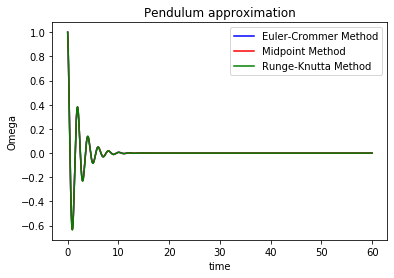

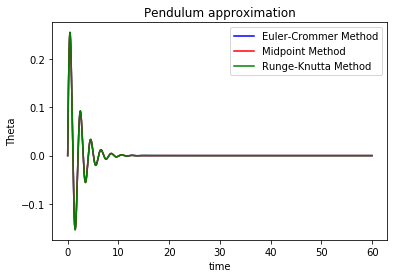

In [5]:
l = 1
g = 9.8
dt = 0.01
T_max = len(np.arange(0, 60, dt))
alpha = 1

starting_omega = 1
starting_theta = 0

ts = np.zeros(T_max)
omega_euler_crommer = np.zeros(T_max)
theta_euler_crommer = np.zeros(T_max)
omega_midpoint = np.zeros(T_max)
theta_midpoint = np.zeros(T_max)
omega_rk = np.zeros(T_max)
theta_rk = np.zeros(T_max)

omega_euler_crommer[0] = starting_omega
theta_euler_crommer[0] = starting_theta
omega_midpoint[0] = starting_omega
theta_midpoint[0] = starting_theta
omega_rk[0] = starting_omega
theta_rk[0] = starting_theta

for i in range(len(ts) - 1):
    ts[i+1] = ts[i] + dt
    omega_euler_crommer[i+1], theta_euler_crommer[i+1] = pendulum_euler_cromer(omega_euler_crommer[i], 
                                                                               theta_euler_crommer[i], g, l, dt, alpha)
    
    omega_midpoint[i+1], theta_midpoint[i+1] = pendulum_midpoint(omega_midpoint[i], 
                                                                 theta_midpoint[i], g, l, dt, alpha)
    
    omega_rk[i+1], theta_rk[i+1] = pendulum_runge_knutta(omega_rk[i], theta_rk[i], g, l, dt, alpha)
    
plt.plot(ts, omega_euler_crommer, 'b', label='Euler-Crommer Method')
plt.plot(ts, omega_midpoint, 'r', label='Midpoint Method')
plt.plot(ts, omega_rk, 'g', label='Runge-Knutta Method')
plt.title('Pendulum approximation')
plt.xlabel('time')
plt.ylabel('Omega')
plt.legend(loc=1)
plt.show()

plt.plot(ts, theta_euler_crommer, 'b', label='Euler-Crommer Method')
plt.plot(ts, theta_midpoint, 'r', label='Midpoint Method')
plt.plot(ts, theta_rk, 'g', label='Runge-Knutta Method')
plt.title('Pendulum approximation')
plt.xlabel('time')
plt.ylabel('Theta')
plt.legend(loc=1)
plt.show()

# Mass on spring oscillator

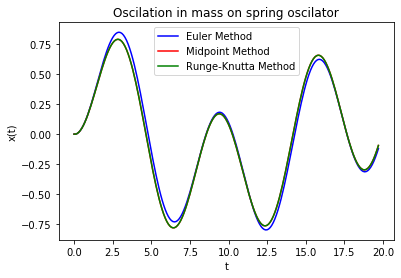

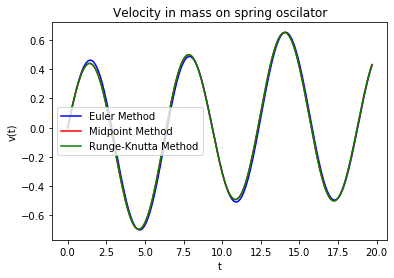

In [7]:
m = 10
F_0 = 5
k = 1
b = 1
omega = 1
T = 2*np.pi*np.sqrt(m/k)
T_max = int(10*T)
dt = 0.1

ts = np.zeros(T_max)
x_euler = np.zeros(T_max)
v_euler = np.zeros(T_max)
x_midpoint = np.zeros(T_max)
v_midpoint = np.zeros(T_max)
x_rk = np.zeros(T_max)
v_rk = np.zeros(T_max)

for i in range(len(ts) - 1):
    ts[i+1] = ts[i] + dt
    
    x_euler[i+1] = x_euler[i] + v_euler[i]*dt
    v_euler[i+1] = v_euler[i] + (1/m)*(F_0*np.cos(omega*ts[i]) - b*v_euler[i] - k*x_euler[i-1])*dt
    
    x_midpoint[i+1] = x_midpoint[i] + v_midpoint[i]*dt
    k1 = (1/m)*(F_0*np.cos(omega*ts[i]) - b*v_midpoint[i] - k*x_midpoint[i-1])
    k2 = (1/m)*(F_0*np.cos(omega*(ts[i] + dt/2)) - b*(v_midpoint[i] + (dt*k1)/2) - k*x_midpoint[i-1])
    v_midpoint[i+1] = v_midpoint[i] + k2*dt
    
    x_rk[i+1] = x_rk[i] + v_rk[i]*dt
    k1 = (1/m)*(F_0*np.cos(omega*ts[i]) - b*v_rk[i] - k*x_rk[i-1])
    k2 = (1/m)*(F_0*np.cos(omega*(ts[i] + dt/2)) - b*(v_rk[i] + (dt*k1)/2) - k*x_rk[i-1])
    k3 = (1/m)*(F_0*np.cos(omega*(ts[i] + dt/2)) - b*(v_rk[i] + (dt*k2)/2) - k*x_rk[i-1])
    k4 = (1/m)*(F_0*np.cos(omega*(ts[i] + dt)) - b*(v_rk[i] + (dt*k3)) - k*x_rk[i-1])
    v_rk[i+1] = v_rk[i] + (1/6)*(k1 + 2*k2 + 2*k3 + k4)*dt

plt.plot(ts, x_euler, 'b', label = 'Euler Method')
plt.plot(ts, x_midpoint, 'r', label = 'Midpoint Method')
plt.plot(ts, x_rk, 'g', label = 'Runge-Knutta Method')
plt.title('Oscilation in mass on spring oscilator')
plt.ylabel('x(t)')
plt.xlabel('t')
plt.legend()
plt.show()

plt.plot(ts, v_euler, 'b', label = 'Euler Method')
plt.plot(ts, v_midpoint, 'r', label = 'Midpoint Method')
plt.plot(ts, v_rk, 'g', label = 'Runge-Knutta Method')
plt.title('Velocity in mass on spring oscilator')
plt.ylabel('v(t)')
plt.xlabel('t')
plt.legend()
plt.show()